In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
X = iris.data
y = iris.target

In [14]:
df = pd.DataFrame(X, columns = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier(n_estimators=100)
# 랜덤포레스트 안에 만들어지는 의사결정 나무 갯수

In [23]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 0, 0, 1,
       0])

In [26]:
from sklearn import metrics

In [27]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9111111111111111


In [29]:
#각 feature의 영향력 확인
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.492845
petal width (cm)     0.425979
sepal length (cm)    0.067540
sepal width (cm)     0.013636
dtype: float64

In [30]:
import matplotlib.pyplot as plt

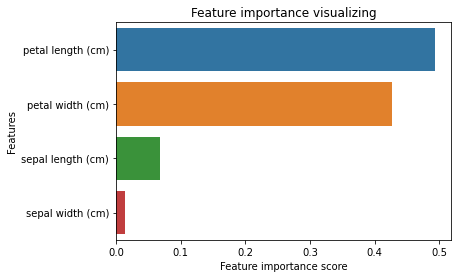

In [32]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Feature importance visualizing")
plt.show()